In [9]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
SELECT  
specialties.name as "Specialty"
FROM 
clients 
INNER JOIN expert_requests
ON clients.id = expert_requests.client
INNER JOIN specialties ON array_to_string(expert_requests.expert_category, '', '*') = specialties.id
WHERE clients.status = 'Active'
"""
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

                 Specialty
0       Project Management
1              Copywriting
2              Copywriting
3        Product Marketing
4                      SEO
..                     ...
155            Advertising
156            Advertising
157  Design + Illustration
158       Data & Analytics
159             Google Ads

[160 rows x 1 columns]


    Count                           Specialty
0      24                         Advertising
1      16                               Email
2      13                                 SEO
3      13                        Social Media
4      12                      Graphic Design
5      11                         Copywriting
6       9         Development & Product-Build
7       7                          Copywriter
8       6                          Google Ads
9       5    Strategy Advisor (Project based)
10      4                            Websites
11      4                              Amazon
12      4            Community / Social Media
13      4                               Video
14      3                         Ad Creative
15      3  CRO (Conversion Rate Optimization)
16      3                   Product Marketing
17      3                    Public Relations
18      2                    Data & Analytics
19      2                             Hubspot
20      2               Influencer

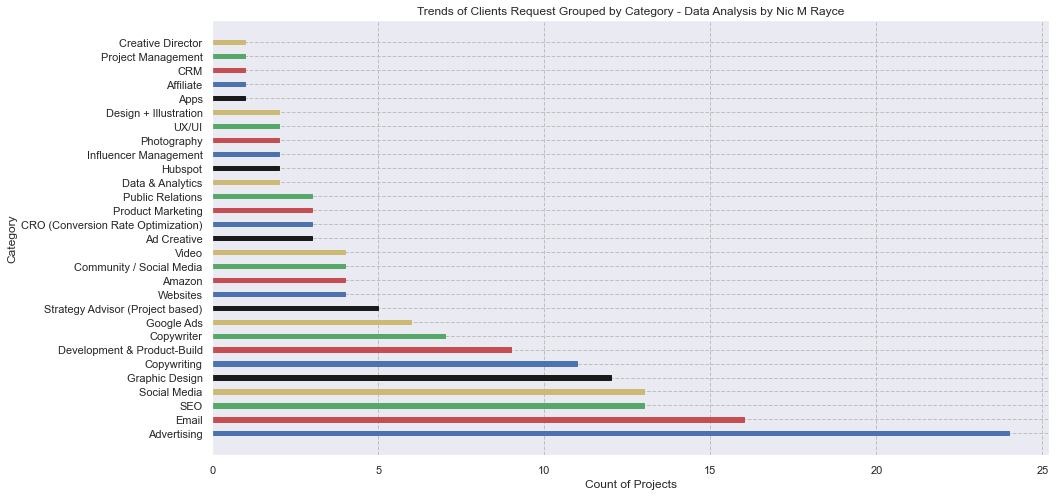

In [33]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
WITH original AS 
(SELECT  
specialties.name as "Specialty"
FROM 
clients 
INNER JOIN expert_requests
ON clients.id = expert_requests.client
INNER JOIN specialties ON array_to_string(expert_requests.expert_category, '', '*') = specialties.id
WHERE clients.status = 'Active')

SELECT count (*) as "Count", original."Specialty"
FROM original
GROUP BY 2
ORDER BY 1 DESC
"""
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

# create data
x = df5['Specialty']
y = df5['Count']
width = 0.3
  
# plot data in grouped manner of bar type
plt.figure(figsize=(15, 8))
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))
plt.barh(x, y, width, color=my_colors, edgecolor=my_colors)
plt.xlabel("Count of Projects")
plt.ylabel("Category")
plt.title("Trends of Clients Request Grouped by Category - Data Analysis by Nic M Rayce")
ax = plt.subplot()
ax.grid(color='silver', linestyle='dashed', linewidth=1)

plt.show()


   10-Day Bucket  Number of Projects
0              2                   3
1              3                   4
2              4                   3
3              5                   3
4              6                   6
5              7                   4
6              9                   1
7             12                   1
8             13                   6


<BarContainer object of 9 artists>

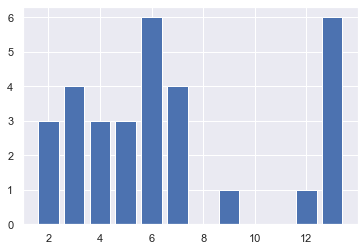

In [46]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
WITH original as
(SELECT  
cast(clients.consult_date as date) as "Start Date", 
expert_requests.date_requested as "End Date",
cast(expert_requests.date_requested as date) - cast(clients.consult_date as date) as "Period" 
FROM 
clients 
INNER JOIN expert_requests
ON clients.id = expert_requests.client
WHERE clients.status = 'Active'
AND clients.consult_date IS NOT NULL)

SELECT cast(case when original."Period" >= 0 and original."Period" <= 10    then '  1'
            when original."Period" > 10 and original."Period" <= 20   then ' 2'
            when original."Period" > 20 and original."Period" <= 30  then ' 3'
            when original."Period" > 30 and original."Period" <= 40   then ' 4'
            when original."Period" > 40 and original."Period" <= 50  then ' 5'
            when original."Period" > 50 and original."Period" <= 60  then ' 6'
            when original."Period" > 60 and original."Period" <= 70    then ' 7'
            when original."Period" > 70 and original."Period" <= 80   then ' 8'
            when original."Period" > 80 and original."Period" <= 90  then ' 9'
            when original."Period" > 90 and original."Period" <= 100   then ' 10'
            when original."Period" > 100 and original."Period" <= 110  then ' 11'
            when original."Period" > 110 and original."Period" <= 120  then ' 12'
            else '13' end as integer) as "10-Day Bucket",
            count(*) as "Number of Projects"
            FROM original
            GROUP BY 1
"""
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

x_data = df5['10-Day Bucket']
y_data = df5['Number of Projects']
plt.bar(x_data, y_data)

In [7]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NOT NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Active Experts (%)" , date_trunc('month', cast("source"."Date" as date))
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

query6 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Inactive Experts (%)" , date_trunc('month', cast("source"."Date" as date))
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset6 = sqlio.read_sql_query(query6,conn)
df6 = pd.DataFrame(data=dataset6)
print(df6)


    Percentage of Active Experts (%)                date_trunc
0                           0.000000 2022-06-01 00:00:00+00:00
1                           6.451613 2022-05-01 00:00:00+00:00
2                          16.393443 2022-04-01 00:00:00+00:00
3                           8.000000 2022-03-01 00:00:00+00:00
4                           7.692308 2022-02-01 00:00:00+00:00
5                          10.526316 2022-01-01 00:00:00+00:00
6                           2.380952 2021-12-01 00:00:00+00:00
7                          10.526316 2021-11-01 00:00:00+00:00
8                          23.076923 2021-10-01 00:00:00+00:00
9                          12.195122 2021-09-01 00:00:00+00:00
10                         27.500000 2021-08-01 00:00:00+00:00
11                         17.000000 2021-07-01 00:00:00+00:00
12                         53.333333 2021-06-01 00:00:00+00:00
13                         58.333333 2021-05-01 00:00:00+00:00
14                         62.500000 2021-04-01 00:00:0

    Percentage of Active Experts (%)         Registration Date
0                           0.000000 2022-06-01 00:00:00+00:00
1                           6.451613 2022-05-01 00:00:00+00:00
2                          16.393443 2022-04-01 00:00:00+00:00
3                           8.000000 2022-03-01 00:00:00+00:00
4                           7.692308 2022-02-01 00:00:00+00:00
5                          10.526316 2022-01-01 00:00:00+00:00
6                           2.380952 2021-12-01 00:00:00+00:00
7                          10.526316 2021-11-01 00:00:00+00:00
8                          23.076923 2021-10-01 00:00:00+00:00
9                          12.195122 2021-09-01 00:00:00+00:00
10                         27.500000 2021-08-01 00:00:00+00:00
11                         17.000000 2021-07-01 00:00:00+00:00
12                         53.333333 2021-06-01 00:00:00+00:00
13                         58.333333 2021-05-01 00:00:00+00:00
14                         62.500000 2021-04-01 00:00:0

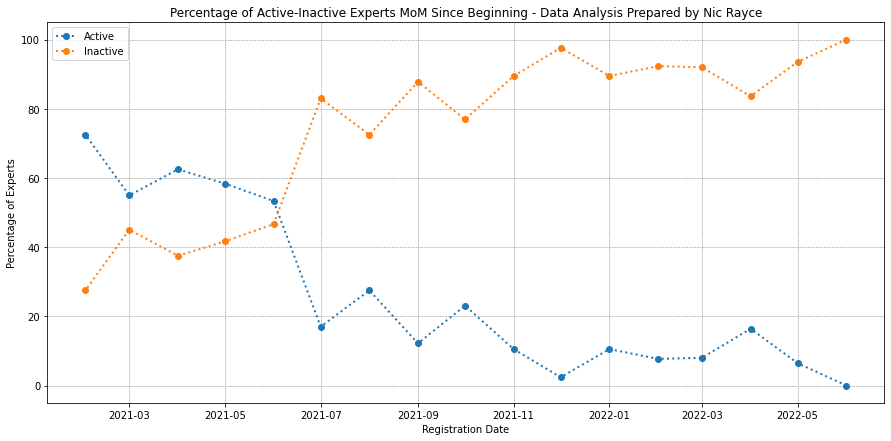

In [10]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NOT NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Active Experts (%)" , date_trunc('month', cast("source"."Date" as date)) as "Registration Date"
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

query6 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Inactive Experts (%)" , date_trunc('month', cast("source"."Date" as date)) as "Registration Date"
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset6 = sqlio.read_sql_query(query6,conn)
df6 = pd.DataFrame(data=dataset6)
print(df6)

# Define Data
xdata1=df5['Registration Date']
ydata1=df5['Percentage of Active Experts (%)']
xdata2=df6['Registration Date']
ydata2=df6['Percentage of Inactive Experts (%)']
    
# Plot
plt.figure(figsize=(15, 7))
plt.plot(xdata1, ydata1, 'o', linestyle = 'dotted', linewidth=2)
plt.plot(xdata2, ydata2, 'o', linestyle = 'dotted', linewidth=2)
plt.legend(['Active', 'Inactive'])
plt.title("Percentage of Active-Inactive Experts MoM Since Beginning - Data Analysis Prepared by Nic Rayce")
plt.xlabel('Registration Date')
plt.ylabel('Percentage of Experts')
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)

plt.show()
